In [1]:
from pyEnergy.cluster import kmeans, kmeans_elbow1
from pyEnergy.final import signal_composition
from pyEnergy.fool import initialize_with_feature_selector
from pyEnergy.drawer import draw_corr

path = "data/ChangErZhai-40-139079-values 20180101-20181031.csv"
###* ----------feature selection start------------------
fool = initialize_with_feature_selector(path, method="pca", selection_params={"n_components": 3, "threshold": 0.3})
#? fool.feature_info = [fool.feature.columns[1], fool.feature.columns[9]]
#? fool.feature = fool.feature[[fool.feature.columns[1], fool.feature.columns[9]]] # 使用1和9（对应matlab 2,10）
#? draw_corr(feature=fool.feature) # 绘制相关图 发现相关系数高达0.98
###* ----------feature selection end--------------------
###* ----------model selection start--------------------
y_pred = kmeans_elbow1(*fool.features(), plot=False, repeat=50, penal=2)
# y_pred = kmeans(*fool.features(), plot=False)
fool.feature["Cluster"]=y_pred
fool.feature_backup["Cluster"]=y_pred
###* ----------model selection end----------------------


['std. real power(ss)', 'ave. real power(ss)', 'trend real power(ss)', 'max. real power(tr)', 'std. reactive power(ss)', 'ave. reactive power(ss)', 'trend reactive power(ss)', 'max. reactive power(tr)', 'std. phase B current(ss)', 'ave. phase B current(ss)', 'trend phase B current(ss)', 'max. phase B current(tr)']
Selected features (PCA-based):
Principal Component 1
Principal Component 2
Principal Component 3
Number of clusters: 2, Silhouette Score: 0.5750
Number of clusters: 3, Silhouette Score: 0.3356
Number of clusters: 4, Silhouette Score: 0.3293
Number of clusters: 5, Silhouette Score: 0.3285
Number of clusters: 6, Silhouette Score: 0.2679
Number of clusters: 7, Silhouette Score: 0.2460
Number of clusters: 8, Silhouette Score: 0.2217
Number of clusters: 9, Silhouette Score: 0.1932
Number of clusters: 10, Silhouette Score: 0.1412
n_clusters: 2, score: 0.5750490127458953


MEAN
Cluster
0    20.473494
1    25.644471
Name: ave. phase B current(ss), dtype: object


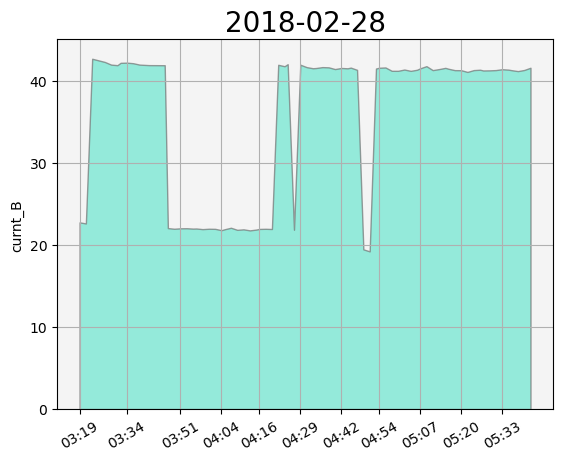

[[1, 0], [1, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [2, 0], [2, 0], [2, 0], [1, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [1, 0], [1, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0]]


TypeError: plot_continuous_lines() missing 1 required positional argument: 'reconstruct_signals'

In [2]:
# show final result plots
import numpy as np
mean_error = np.array([])
median_error = np.array([])
max = len(fool.other_event)
for j in range(0,1):
    print("MEAN")
    sols, err = signal_composition(fool, event_param="curnt_B", feature_param=fool.param_feature_dict["curnt_B"][1], reduce=True, index=j, up_bound=None, n_color=7)
    # print("err:", err)

In [ ]:
np.mean(mean_error-median_error)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
median_error = pd.DataFrame(median_error, columns=["median"])
mean_error = pd.DataFrame(mean_error,columns=["mean"])
error = pd.concat([median_error, mean_error])
pd.plotting.boxplot(error)
